# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]

Polecane źródła - teoria + intuicja:
- https://distill.pub/2019/paths-perspective-on-value-learning/
- https://www.youtube.com/watch?v=0iqz4tcKN58&ab_channel=SteveBrunton

In [1]:
import numpy as np
import random
import time
import gymnasium as gym
import matplotlib.pyplot as plt

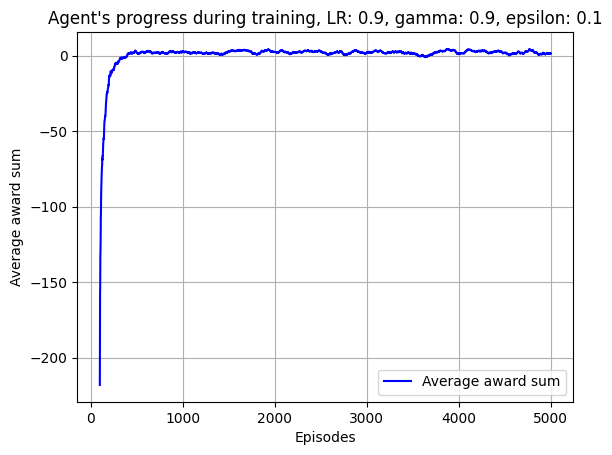

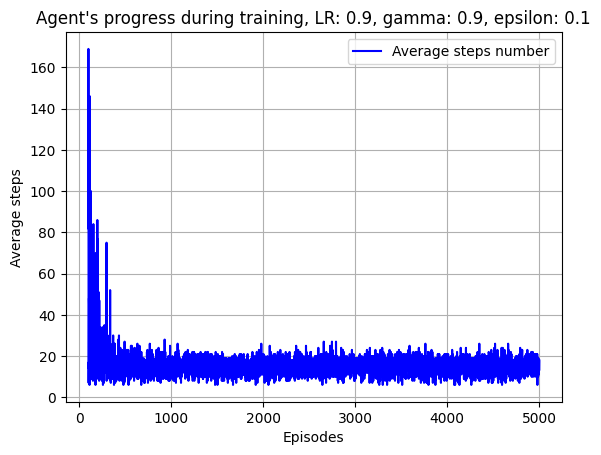

State: 223, Final_state: False, Reward: -1
State: 123, Final_state: False, Reward: -1
State: 103, Final_state: False, Reward: -1
State: 3, Final_state: False, Reward: -1
State: 19, Final_state: False, Reward: -1
State: 119, Final_state: False, Reward: -1
State: 219, Final_state: False, Reward: -1
State: 239, Final_state: False, Reward: -1
State: 259, Final_state: False, Reward: -1
State: 279, Final_state: False, Reward: -1
State: 379, Final_state: False, Reward: -1
State: 479, Final_state: False, Reward: -1
State: 475, Final_state: True, Reward: 20
Total reward: 8


In [19]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q_table = np.zeros((observation_space, action_space))

    def __call__(self, state: int, action: int) -> float:
        """Return Q-value of given state and action."""
        return self.Q_table[state][action]

    def update(self, state: int, action: int, reward: float, next_state: int) -> None:
        """Update Q-value of given state and action."""
        self.Q_table[state, action] += self.learning_rate * (reward + self.gamma * np.max(self.Q_table[next_state]) - self(state, action))

    def get_best_action(self, state: int) -> int:
        """Return action that maximizes Q-value for a given state."""
        return np.argmax(self.Q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return f"QLearningSolver(observation_space={self.observation_space}, action_space={self.action_space}, Q_table=\n{self.Q_table})"

    def __str__(self):
        return self.__repr__()

def plot_average_rewards(average_rewards: list[float], episodes: list[int], learning_rate: float, gamma: float, epsilon: float):
    """Generate a plot showing the average rewards during training."""
    plt.plot(episodes, average_rewards, label="Average award sum", color="blue")
    plt.xlabel("Episodes")
    plt.ylabel("Average award sum")
    plt.title(f"Agent's progress during training, LR: {learning_rate}, gamma: {gamma}, epsilon: {epsilon}")
    plt.grid()
    plt.legend()
    plt.savefig("average_rewards_plot.png")
    plt.show()

def plot_average_steps(steps: list[int], episodes: list[int], learning_rate: float, gamma: float, epsilon: float):
    """Generate a plot showing the average steps number during training."""
    plt.plot(episodes, steps, label="Average steps number", color="blue")
    plt.xlabel("Episodes")
    plt.ylabel("Average steps")
    plt.title(f"Agent's progress during training, LR: {learning_rate}, gamma: {gamma}, epsilon: {epsilon}")
    plt.grid()
    plt.legend()
    plt.savefig("average_steps_plot.png")
    plt.show()

def main():
    STATES = 500
    ACTIONS = 6
    LEARNING_RATE = 0.9
    GAMMA = 0.9
    EPSILON = 0.1
    EPOCHS = 5000
    MOVING_AVG_WINDOW = 100 

    env = gym.make("Taxi-v3", render_mode="ansi")
    q_learning_solver = QLearningSolver(STATES, ACTIONS, LEARNING_RATE, GAMMA, EPSILON)

    rewards_per_episode = []
    average_rewards = []
    episodes = []
    steps = []

    for episode in range(EPOCHS):
        state, _ = env.reset()
        total_reward = 0
        done = False
        steps_in_episode = 0

        while not done:
            if random.random() < q_learning_solver.epsilon:
                action = env.action_space.sample()
            else:
                action = q_learning_solver.get_best_action(state)
            next_state, reward, done, _, _ = env.step(action)
            q_learning_solver.update(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps_in_episode += 1

        rewards_per_episode.append(total_reward)

        if episode >= MOVING_AVG_WINDOW:
            avg_reward = np.mean(rewards_per_episode[-MOVING_AVG_WINDOW:])
            average_rewards.append(avg_reward)
            episodes.append(episode)
            steps.append(steps_in_episode)
    plot_average_rewards(average_rewards, episodes, LEARNING_RATE, GAMMA, EPSILON)
    plot_average_steps(steps, episodes, LEARNING_RATE, GAMMA, EPSILON)

    state, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = q_learning_solver.get_best_action(state)
        state, reward, done, _, _ = env.step(action)
        total_reward += reward
        time.sleep(0.1)
        print(f"State: {state}, Final_state: {done}, Reward: {reward}")
    print(f"Total reward: {total_reward}")

main()


# Eksperymenty

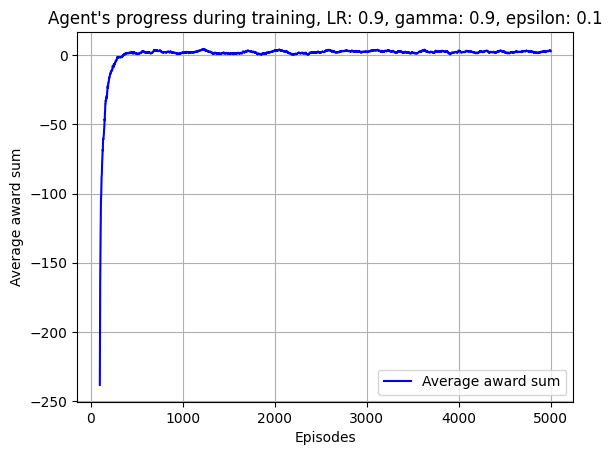

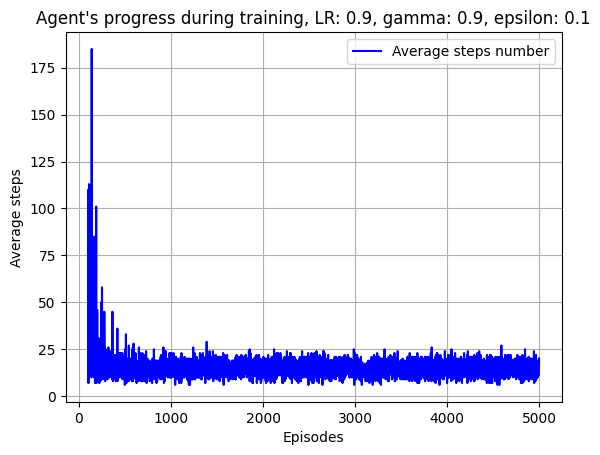

State: 134, Final_state: False, Reward: -1

State: 114, Final_state: False, Reward: -1

State: 214, Final_state: False, Reward: -1

State: 234, Final_state: False, Reward: -1

State: 254, Final_state: False, Reward: -1

State: 274, Final_state: False, Reward: -1

State: 374, Final_state: False, Reward: -1

State: 474, Final_state: False, Reward: -1

State: 478, Final_state: False, Reward: -1

State: 378, Final_state: False, Reward: -1

State: 278, Final_state: False, Reward: -1

State: 258, Final_state: False, Reward: -1

State: 238, Final_state: False, Reward: -1

State: 218, Final_state: False, Reward: -1

State: 318, Final_state: False, Reward: -1

State: 418, Final_state: False, Reward: -1

State: 410, Final_state: True, Reward: 20

Total reward: 4

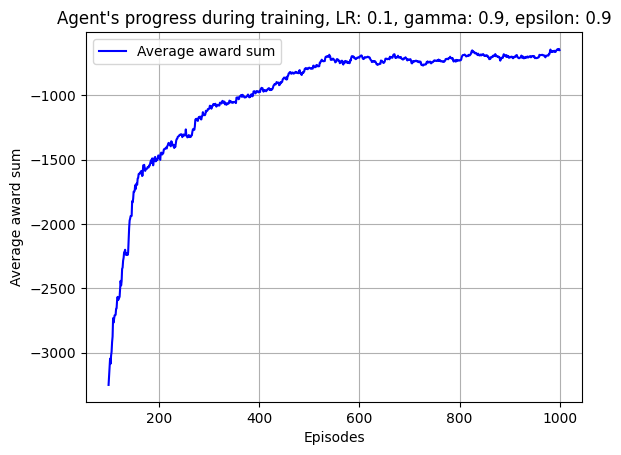

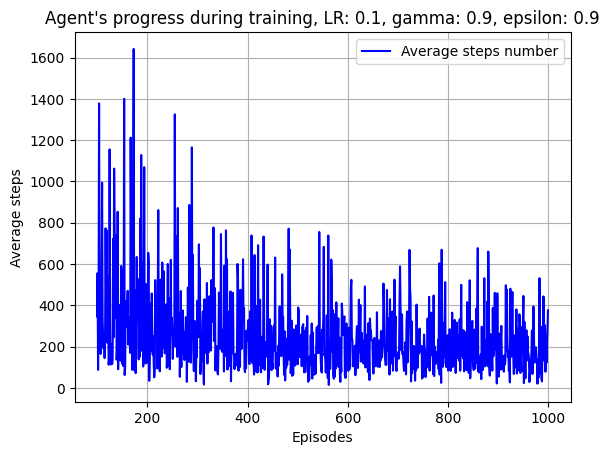

State: 384, Final_state: False, Reward: -1

State: 284, Final_state: False, Reward: -1

State: 184, Final_state: False, Reward: -1

State: 84, Final_state: False, Reward: -1

State: 96, Final_state: False, Reward: -1

State: 196, Final_state: False, Reward: -1

State: 176, Final_state: False, Reward: -1

State: 156, Final_state: False, Reward: -1

State: 256, Final_state: False, Reward: -1

State: 236, Final_state: False, Reward: -1

State: 216, Final_state: False, Reward: -1

State: 116, Final_state: False, Reward: -1

State: 16, Final_state: False, Reward: -1

State: 0, Final_state: True, Reward: 20

Total reward: 7

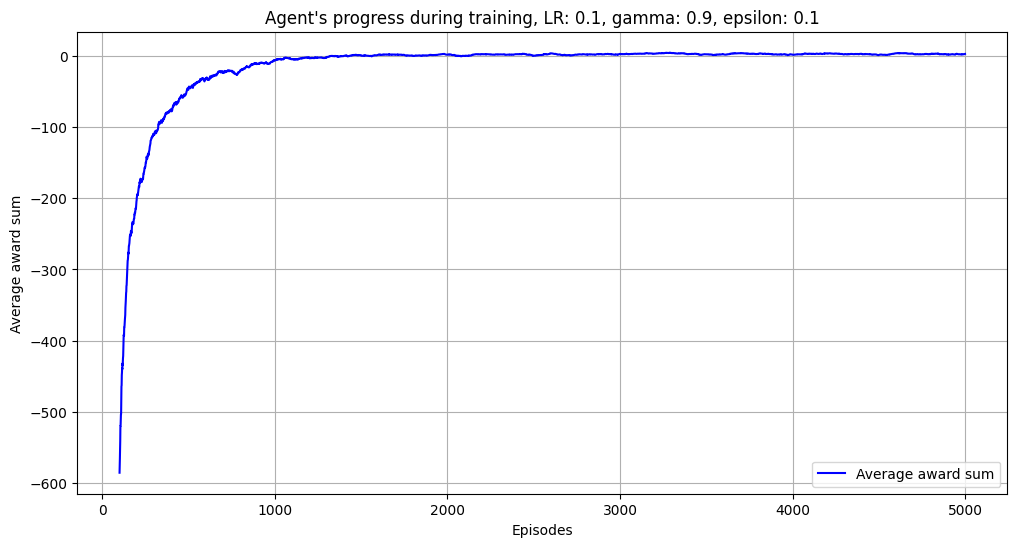
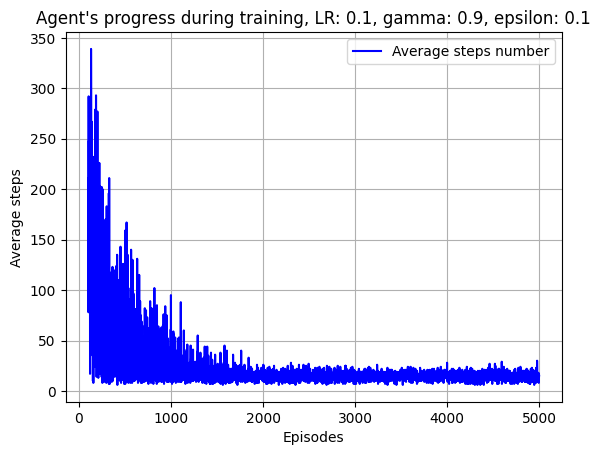

State: 164, Final_state: False, Reward: -1

State: 64, Final_state: False, Reward: -1

State: 84, Final_state: False, Reward: -1

State: 96, Final_state: False, Reward: -1

State: 196, Final_state: False, Reward: -1

State: 296, Final_state: False, Reward: -1

State: 276, Final_state: False, Reward: -1

State: 256, Final_state: False, Reward: -1

State: 236, Final_state: False, Reward: -1

State: 136, Final_state: False, Reward: -1

State: 116, Final_state: False, Reward: -1

State: 16, Final_state: False, Reward: -1

State: 0, Final_state: True, Reward: 20

Total reward: 8

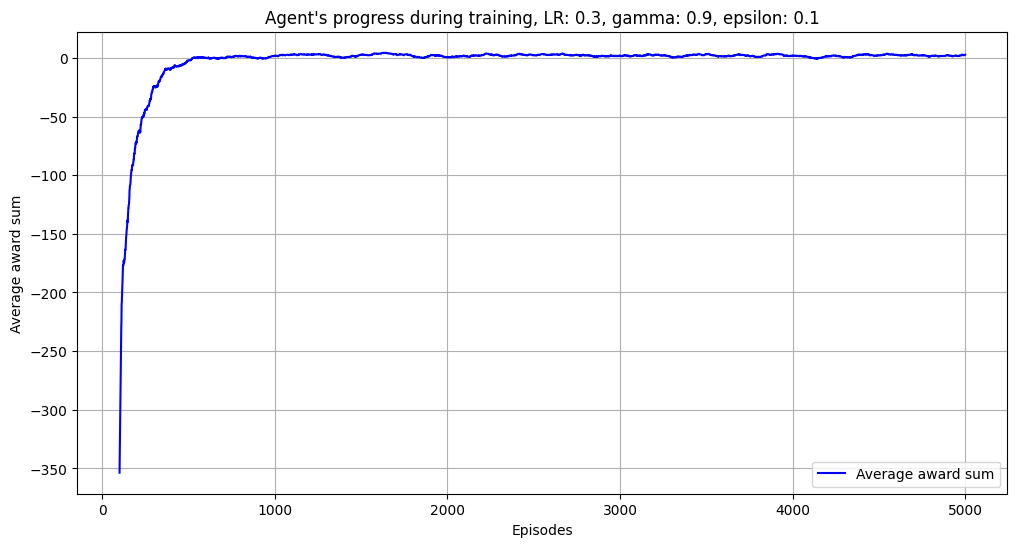
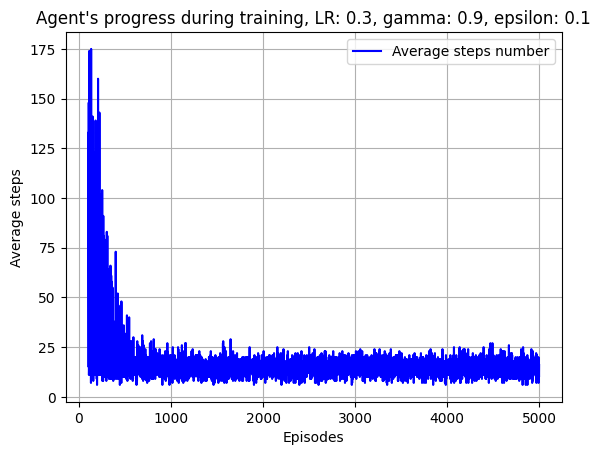

State: 209, Final_state: False, Reward: -1

State: 309, Final_state: False, Reward: -1

State: 409, Final_state: False, Reward: -1

State: 417, Final_state: False, Reward: -1

State: 317, Final_state: False, Reward: -1

State: 217, Final_state: False, Reward: -1

State: 237, Final_state: False, Reward: -1

State: 257, Final_state: False, Reward: -1

State: 157, Final_state: False, Reward: -1

State: 177, Final_state: False, Reward: -1

State: 77, Final_state: False, Reward: -1

State: 97, Final_state: False, Reward: -1

State: 85, Final_state: True, Reward: 20

Total reward: 8

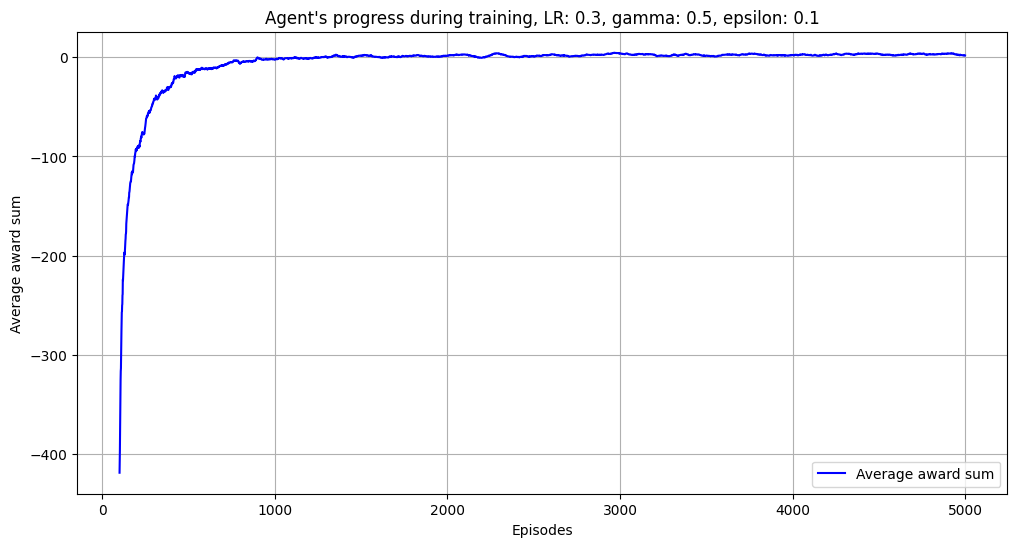
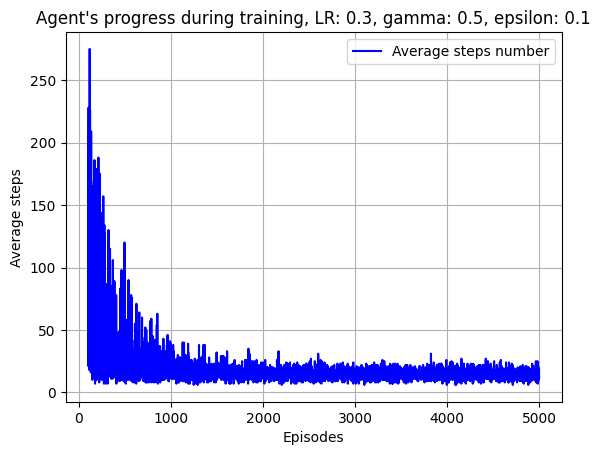

State: 101, Final_state: False, Reward: -1

State: 1, Final_state: False, Reward: -1

State: 17, Final_state: False, Reward: -1

State: 117, Final_state: False, Reward: -1

State: 217, Final_state: False, Reward: -1

State: 237, Final_state: False, Reward: -1

State: 257, Final_state: False, Reward: -1

State: 277, Final_state: False, Reward: -1

State: 177, Final_state: False, Reward: -1

State: 197, Final_state: False, Reward: -1

State: 97, Final_state: False, Reward: -1

State: 85, Final_state: True, Reward: 20

Total reward: 9

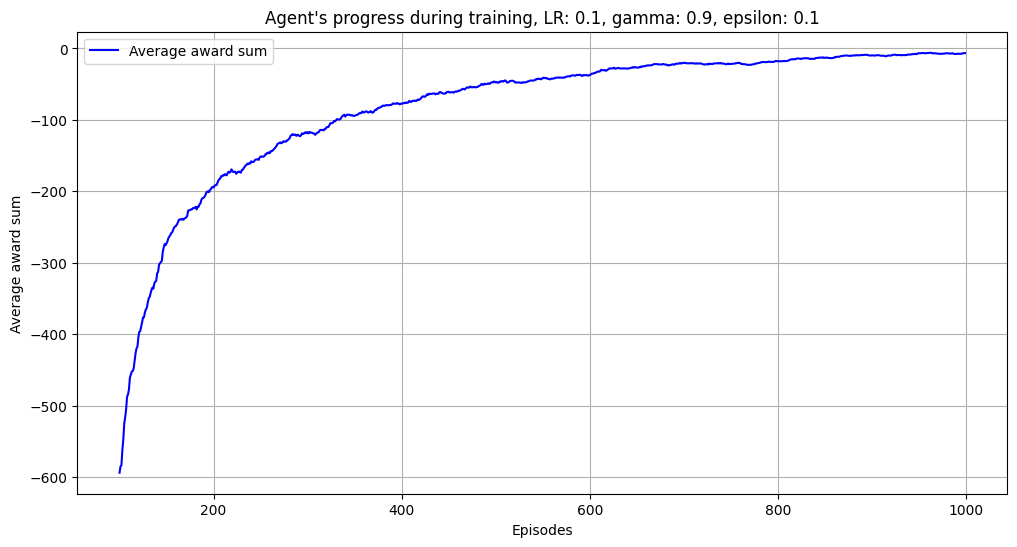
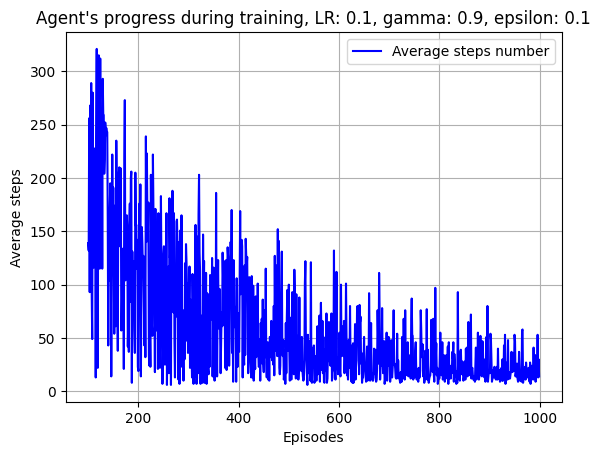

State: 167, Final_state: False, Reward: -1

State: 67, Final_state: False, Reward: -1

State: 87, Final_state: False, Reward: -1

State: 99, Final_state: False, Reward: -1

State: 199, Final_state: False, Reward: -1

State: 299, Final_state: False, Reward: -1

State: 279, Final_state: False, Reward: -1

State: 379, Final_state: False, Reward: -1

State: 479, Final_state: False, Reward: -1

State: 475, Final_state: True, Reward: 20

Total reward: 11

# Wnioski

1. Learning Rate:

    Określa, jak dużą wagę mają nowe informacje w porównaniu do istniejących wartości Q. Najlepszym wyborem jest duży learning rate np na poziomie 0.9.

2. Gamma:

    Określa, jak dużą wagę agent przywiązuje do przyszłych nagród. Najlepszym wyborem jest duża wartość gamma np 0.9.

3. Epsilon:

    Określa prawdopodobieństwo, że agent wybierze losowe działanie zamiast najlepszego według obecnej wiedzy. Najlepszym wyborem jest niska wartość epsilon np 0.1.